### 3 - Modelagem 

Nesta etapa vamos estudar os modelos de clusterização que consiga diferenciar os dados por padrões, também iremos utilizar técnicas para determinar o número de classes de clientes que podemos agrupar e determinar quais as features mais significantes para a classificação de clientes em cada classe. 

Para isso, vamos utilizar ferramentas de aprendizado não-supervisionado presentes na biblioteca **ScikitLearn**. 



In [4]:
#Importar bibliotecas

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
#Importar os dados tratados

df = pd.read_csv("/home/edmurcn/Documentos/MeusProjetos/Customer-Clustering/data/dados_tratado.csv", header=0)

A primeira abordagem a se fazer na etapa de modelagem em um projeto de clusterização é o cálculo do *Optimal Value of K*, ou seja, o número mais adequado de grupos que podemos segmentar os clientes. Para obter este valor vamos utilizar técnicas simples como **Elbow Method** e **Silhouette Method**.

<div>
    <div style="float:left; width: 45%;">
        <p style="text-align: left;">   - <strong> Elbow Method </strong> utiliza o modelo de <strong> K-means </strong> da biblioteca ScikitLearn, o modelo divide os clientes em K grupos, e para cada um desses grupos vamos calcular o valor de <strong> WCSS </strong>, esta medida reflete a soma das distâncias ao quadrado de cada indivíduo para o centroide do cluster ao qual ele pertence, e o objetivo do método é minimizar ótimamente este valor, com a variação de K. Então traçamos uma curva de WCSS para cada quantidade de cluster, a partir disso podemos encontrar o Elbow point, ou seja, o ponto de dobra, em que o aumento da quantidade de clusters não afeta tão significativamente a medida de WCSS. 
        Outra curva que pode ser construída e analisada por este método utiliza o valor de <strong> BCSS </strong>, esta medida por sua vez, busca calcular a soma das distâncias ao quadrado entre cada centroide dos clusters, nota-se que seria interessante sua maximização, então, obtemos o K analogamente ao processo anterior.   </p>
    </div>
    <div style="float:right; width: 45%;">
        <p style="text-align: left;">   - <strong> Silhouette Method </strong>  também utiliza o modelo K-means para realizar a clusterização a princípio, após os clientes serem agrupados aplicamos uma equação para calcular o coeficiente de silhueta, essa equação se baseia nas distâncias entre os pontos no plano cartesiano, onde cada eixo representa uma coluna do conjunto e cada ponto é um cliente, então calculamos a distância média de cada ponto para os pontos pertencentes ao mesmo grupo e a distância entre o mesmo ponto e o ponto mais próximo, realizamo a subtração do segundo pelo primeiro e normalizamos a equação dividindo pelo valor maximo entre os dois. 
        Dessa forma, obtemos um coeficiente entre -1 e 1, em que, valores mais próximos de 1 indicam que o ponto está bem inserido em seu grupo e longe de outros grupos, valores próximos de 0 indicam que os cluters estão sobrepostos, caso contrário não houve uma eficiente separação entre os dados. </p>
    </div>
</div>

<div>
    <div style="float:left; width: 45%;">
        <img src="/home/edmurcn/Documentos/MeusProjetos/Customer-Clustering/images/elbow1.png" style="display: block; margin: auto;">
    </div>
    <div style="float:right; width: 40%;">
       <img src="/home/edmurcn/Documentos/MeusProjetos/Customer-Clustering/images/silhouette.webp" style="display: block; margin: auto;">
      </div>
</div>





In [7]:
# Padronização dos dados para a aplicação do modelo

from sklearn.preprocessing import StandardScaler

X = df.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

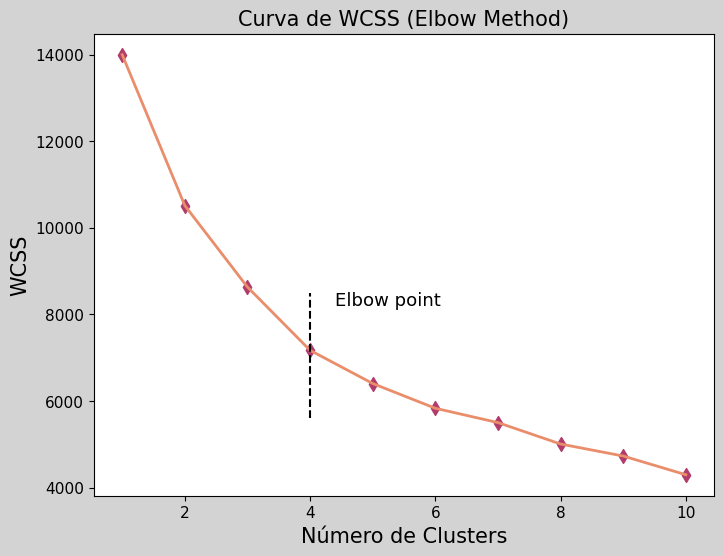

In [69]:
# Implementação de Elbow method
from sklearn.cluster import KMeans

palette = sns.color_palette("flare")
wcss = []
k = np.arange(1,11)

# looping para o valor de k

for i in k:
    model = KMeans(n_clusters=i, init="k-means++", max_iter=10, n_init=10, random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)

#Construção do gráfico

plt.figure(figsize=(8,6), facecolor="lightgray")
plt.scatter(k, wcss, s=50, marker="d", color=palette[3])
plt.plot(k, wcss, linewidth=2, color=palette[0])
plt.title("Curva de WCSS (Elbow Method)", fontsize=15)
plt.xlabel("Número de Clusters", fontsize=15)
plt.ylabel("WCSS", fontsize=15)
plt.vlines(x=4, ymin=5600, ymax=8500, linestyle="--", color="black")
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.text(4.4, 8200, s="Elbow point", fontsize=13)
plt.show()

In [87]:
#Implementação de Silhouette Method

from sklearn.metrics import silhouette_score, silhouette_samples

s_coef = []
k = np.arange(2,8)

# Criando espaço para os gráficos das silhuetas

palette = sns.color_palette("flare", as_cmap=True)
fig, ax = plt.subplots(3, 3, facecolor="lightgray", figsize=(16, 12))

# Condições para determinar a posição dos gráficos (subplots)

def col_row(n):
    col = n % 3
    row = n // 3
    return row, col

# looping para o valor de k


for n_cluster in k:
     
    n = n_cluster - 2
    model = KMeans(n_clusters=n_cluster, init="k-means++", max_iter=10, n_init=10, random_state=42)

    #cálculo do coeficiente 

    cluster_label = model.fit_predict(X)
    s_coef_loop = silhouette_score(X, cluster_label, random_state=42)
    s_coef.append(s_coef_loop)
    s_sample = silhouette_samples(X, cluster_label)

    #construção dos gráficos

    y_lower = 10
    for i in range(n_cluster):

        # reescrevendo as amostras de coeficientes para cada cluster

        sample_by_cluster = s_sample[cluster_label == i]
        sample_by_cluster.sort()

        # espessura da silhueta

        y_upper = y_lower + sample_by_cluster.shape[0]
        
        # Preenchendo os valores do gráfico

        row, col = col_row(n)

        ax[row, col]
        
        # Aplicando detalhes ao gráfico

        ax[row, col].text(-0.05, y_lower + 0.5 * sample_by_cluster.shape[0], str(i))
        ax[row, col].axvline(x=s_coef_loop, color="r", linestyle="--")
        ax[row, col].set_yticks([])
        ax[row, col].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        y_lower = y_upper + 10

plt.show()

ValueError: Image size of 1302x536980 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x1200 with 9 Axes>

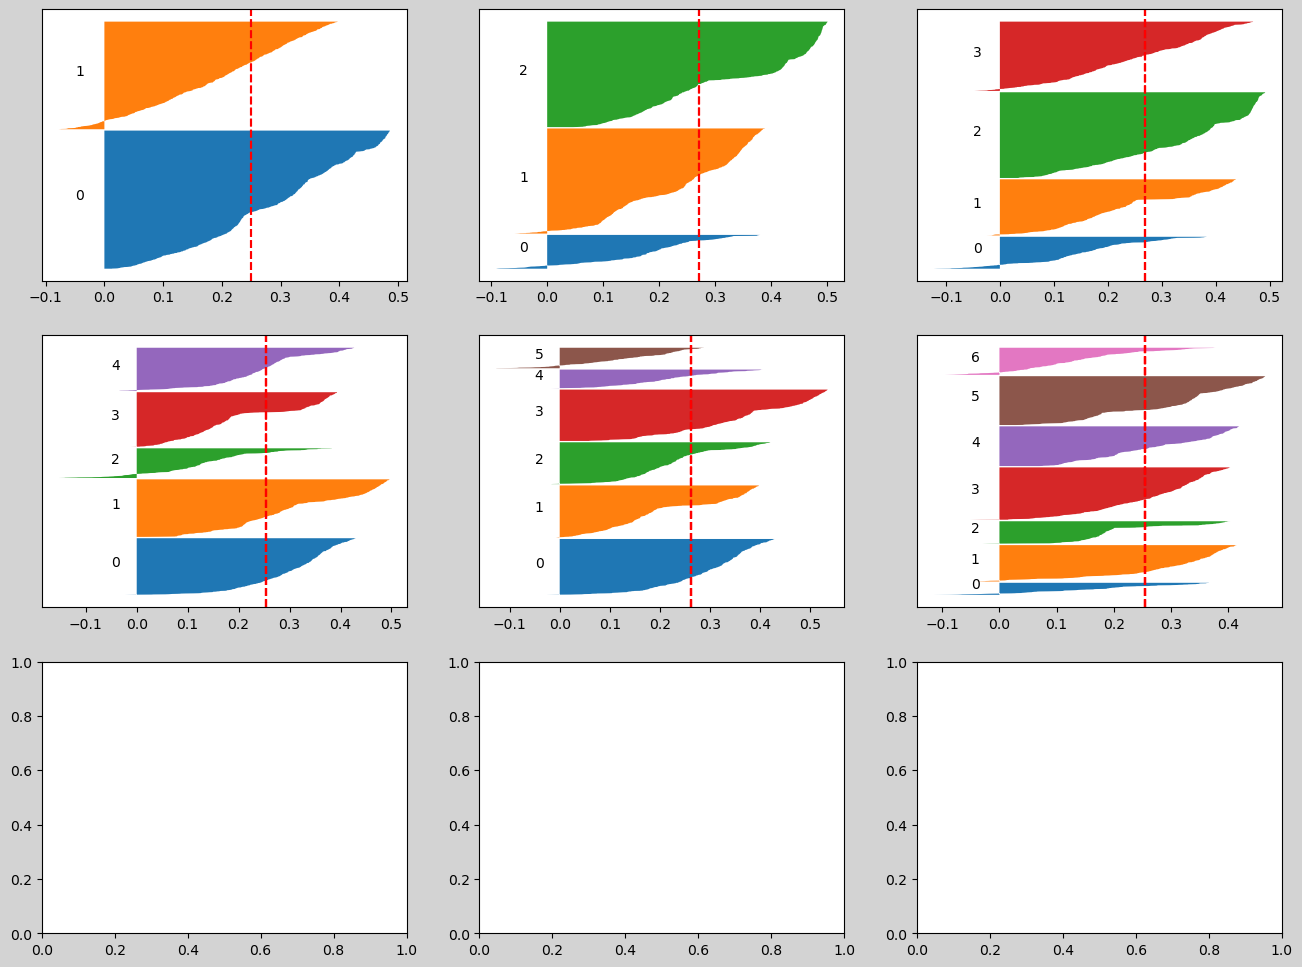

In [84]:
#Implementação de Silhouette Method

from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

s_coef = []
k = np.arange(2, 8)

# Criando espaço para os gráficos das silhuetas
fig, ax = plt.subplots(3, 3, facecolor="lightgray", figsize=(16, 12))

# Condições para determinar a posição dos gráficos (subplots)
def col_row(n):
    col = n % 3
    row = n // 3
    return col, row

# looping para o valor de k
for n_cluster in k:
    n = n_cluster - 2  # Para garantir que n comece de 0
    model = KMeans(n_clusters=n_cluster, init="k-means++", max_iter=10, n_init=10, random_state=42)

    # Cálculo do coeficiente 
    cluster_label = model.fit_predict(X)
    s_coef_loop = silhouette_score(X, cluster_label, random_state=42)
    s_coef.append(s_coef_loop)
    s_sample = silhouette_samples(X, cluster_label)

    # Construção dos gráficos
    y_lower = 10
    for i in range(n_cluster):
        # Reescrevendo as amostras de coeficientes para cada cluster
        sample_by_cluster = s_sample[cluster_label == i]
        sample_by_cluster.sort()
        # Espessura da silhueta
        y_upper = y_lower + sample_by_cluster.shape[0]
        # Preenchendo os valores do gráfico
        col, row = col_row(n)
        ax[row, col].fill_betweenx(np.arange(y_lower, y_upper), 0, sample_by_cluster, edgecolor="none")
        # Aplicando detalhes ao gráfico
        ax[row, col].text(-0.05, y_lower + 0.5 * sample_by_cluster.shape[0], str(i))
        ax[row, col].axvline(x=s_coef_loop, color="r", linestyle="--")
        ax[row, col].set_yticks([])
        # ax[row, col].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        y_lower = y_upper + 10 

# Exibindo os gráficos
plt.show()
